<a href="https://colab.research.google.com/github/Haanaahh/CUSTOMER_CHURN_PREDICTION/blob/main/RETAIL_SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETAIL SALES PREDICTION**

Retail sales prediction is used to predict the most moving or which product is going to sell more. It will  also helps to buy products as customers need. which helps to get profit. and shows which is not moving and helps to make discount on the right products.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')  # load dataset

In [ ]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df.head(10) # 1st 10 data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [ ]:
df.shape # count of rows and columns

(1000, 9)

In [ ]:
df.columns # columns name

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df.dtypes # data type

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
df.info() # to check the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.isnull().sum() # check null values

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.nunique() # provide unique value

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000




*   Transaction
  - count - 1000 customers
  - mean or avg transaction is 500
  - 1-1000 (min -max) transations

*   Age
  - count - 1000 customers
  - (min-max) - 18 - 64 age


*   Quanitity
  - count 1000 customers
  - mean or avg 2.5 product
  - (min-max) -1-4 product

*   Price per unit
  - count - 1000 customers
  - mean or avg transaction is 179
  - 25-500 (min -max) per unit

*  Total Amount
  - avg or mean - Rs 456
  - 25-2000 (min-max) amount






In [ ]:
df.describe(include='object')

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST1000,Female,Clothing
freq,11,1,510,351


### HISTOGRAM - DISTRIBUTION BASED ON TOTAL SALES

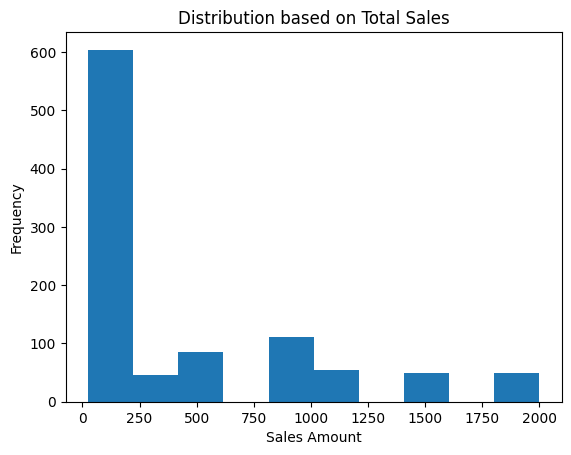

In [ ]:
plt.hist(df['Total Amount'])
plt.title("Distribution based on Total Sales")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

In this graph  Rs 0-250 sale amount is more in number. Peoples near to 600 are buying with the amount from 0-250.
- When the sales amount increase fequency decreases. Majority sales amount  is low
- Very few peoples 750+ - 1000 is slightly more comparitively

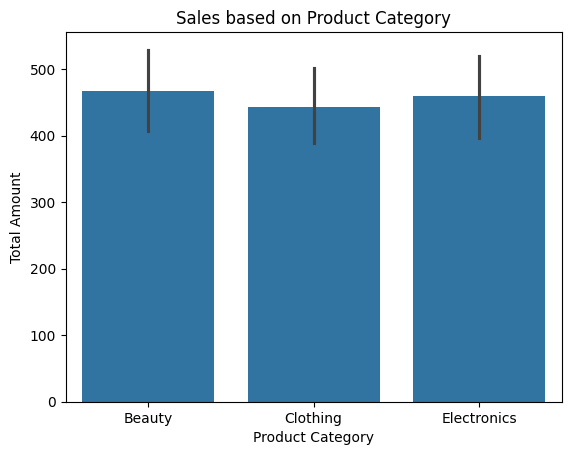

In [ ]:
sns.barplot (data=df ,x='Product Category', y='Total Amount')
plt.title("Sales based on Product Category")
plt.show()

On the observation of the graph beauty is slightly up comparively although everything same approx same it total amount. then comes electronics and last clothing product category.
All 3 have also same sales

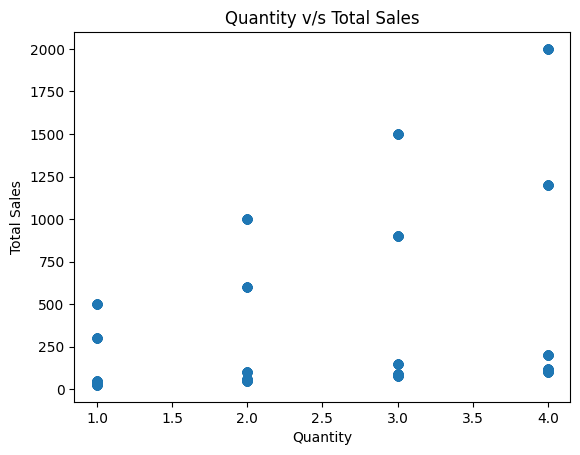

In [ ]:
plt.scatter(df['Quantity'], df['Total Amount'])
plt.title("Quantity v/s Total Sales")
plt.xlabel("Quantity")
plt.ylabel("Total Sales")
plt.show()

On the observation of the graph its shows customers buy only 1 or 2 items, the total money from the sale can still be high if the items are expensive. and on the other hand when they buy 3 or 4 items then the total sales amount is usually higher  but not always.this is because the total sales also depend on how much each item costs not just the number of items bought.

In [ ]:
df.columns # columns name

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Date','Transaction ID',  'Customer ID'])  # dropping some columns

In [ ]:
df.columns # checking

Index(['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit',
       'Total Amount'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Product Category'])

changing the char to numeric so  that machine can understand

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

standardScaler is used to make all the numeric in same level so 1 might not be high and other low

In [ ]:
dm= df[['Age', 'Quantity', 'Price per Unit']]

In [ ]:
dm

,Age,Quantity,Price per Unit
0,34,3,50
1,26,2,500
2,50,1,30
3,37,1,500
4,30,2,50
...,...,...,...
995,62,1,50
996,52,3,30
997,23,4,25
998,36,3,50


In [ ]:
dm = scaler.fit_transform(dm)

#### Train and testing data

In [ ]:
x = df.drop('Total Amount', axis=1) # feature
x

,Age,Quantity,Price per Unit,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,34,3,50,False,True,True,False,False
1,26,2,500,True,False,False,True,False
2,50,1,30,False,True,False,False,True
3,37,1,500,False,True,False,True,False
4,30,2,50,False,True,True,False,False
...,...,...,...,...,...,...,...,...
995,62,1,50,False,True,False,True,False
996,52,3,30,False,True,True,False,False
997,23,4,25,True,False,True,False,False
998,36,3,50,True,False,False,False,True


In [97]:
y = df['Total Amount'] # Target
y

,Total Amount
0,150
1,1000
2,30
3,500
4,100
...,...
995,50
996,90
997,100
998,150


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(800, 8)

In [ ]:
y_train.shape

(800,)

In [ ]:
x_test.shape

(200, 8)

In [ ]:
y_test.shape

(200,)

#### RIDGE REGRESSION

Ridge Regression model and storing it in variable rdm

In [ ]:
rdm = Ridge(alpha=1.0)
rdm

Ridge()

In [ ]:
rdm.fit(x_train, y_train)

Ridge()

In [ ]:
y_pred_rdm = rdm.predict(x_test)

#### LASSO REGRESSION

Lasso Regression model and storing it in variable lm

In [ ]:
lm = Lasso(alpha=0.1)
lm

Lasso(alpha=0.1)

In [ ]:
lm.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_lm = lm.predict(x_test)

#### LINEAR REGRESSION

Linear regression model and storing it in variable lr

In [ ]:
lr = LinearRegression()
lr

LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(x_test)

In [ ]:
def em(y_true, y_pred, model_name):
    print(f"{model_name}")
    print("Mean squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))


- Mean Square Error says that how the predictions are from actual value
- Mean Absolute Error says difference between actual and predicted values
- R^2 score between 0 and 1

In [ ]:
em(y_test, y_pred_lr, "Linear Regression")


Linear Regression
Mean squared Error: 204.6557891751739
Mean Absolute Error: 173.20854346790782
R² Score: 0.8569189755192648


In [ ]:
em(y_test, y_pred_rdm, "Ridge Regression")


Ridge Regression
Mean squared Error: 204.64326350013545
Mean Absolute Error: 173.1704584295461
R² Score: 0.856936489136445


In [ ]:
em(y_test, y_pred_lm, "Lasso Regression")

Lasso Regression
Mean squared Error: 204.64669851010441
Mean Absolute Error: 173.18192428056747
R² Score: 0.8569316863523028


-  All 3 models is almost same which means they all perform same . the model is stable and clean. this is really a good thing. there is only sighly change in value

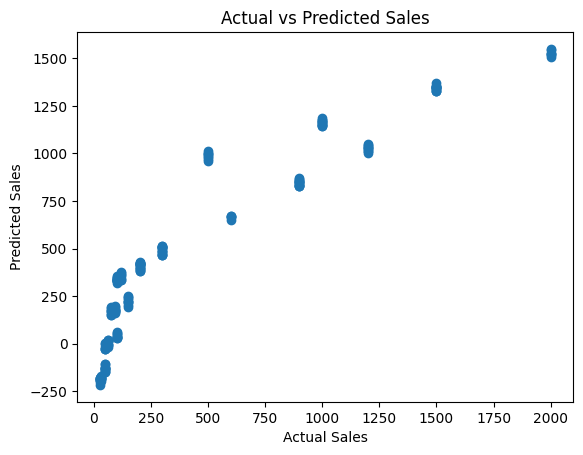

In [ ]:
plt.scatter(y_test, y_pred_lm)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

x-axis - actual sales according to the dataset

y-axis - predicted sales by the model

On the observation actual and predicted sales is going up . which means its a good model .

model made some small mistakes which shows the dots by below


In [ ]:
feature_names = x.columns
coefficients = lm.coef_

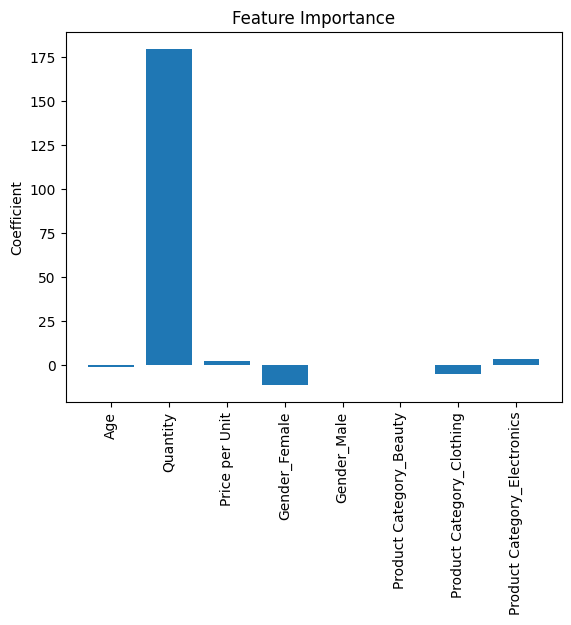

In [ ]:
plt.bar(feature_names, coefficients)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.ylabel("Coefficient")
plt.show()

On the observation of the graph quality is with tall bar so it is the most important thing to consider in this graph

if the customers buy more products the total sales as increses eventally

gender have small and negative impact


- The more the products is sold the more sales get high
- If costly products can make profit but in less quanitity

#### RECOMMENTATION

- Sell more product in a transactions like make combos.
- Sell product which is expensive it can make a huge impact of profit
- Provide a small discount on half products , discounts attracts and transation increase
- Provide Sales days which attracts even more than usual customers
- Give coupons above a specfic amount and small free gifts. Coupons make a customers come again

-------------------END-------------------